In [1]:
!pip install pycaret

  Using cached pycaret-1.0.0-py3-none-any.whl (188 kB)
  Using cached yellowbrick-1.0.1-py3-none-any.whl (378 kB)
  Using cached DateTime-4.3-py2.py3-none-any.whl (60 kB)
  Using cached shap-0.32.1-cp37-cp37m-macosx_10_7_x86_64.whl (294 kB)
Processing /Users/tomas/Library/Caches/pip/wheels/66/5a/1f/f1d545c72a3d2303225d4eee7bfb5df1edb5054b14658980fd/xgboost-0.90-cp37-cp37m-macosx_10_15_x86_64.whl
Processing /Users/tomas/Library/Caches/pip/wheels/3b/73/50/6fe0ae0386b5803013b304a139e3d48bbea84192f6ae82f615/umap_learn-0.4.1-py3-none-any.whl
  Using cached spacy-2.2.4-cp37-cp37m-macosx_10_9_x86_64.whl (10.5 MB)
     |████████████████████████████████| 215 kB 5.2 MB/s eta 0:00:01
  Using cached datefinder-0.7.0-py2.py3-none-any.whl (8.8 kB)
  Using cached wordcloud-1.6.0-cp37-cp37m-macosx_10_6_x86_64.whl (157 kB)
  Using cached lightgbm-2.3.1-py2.py3-none-macosx_10_9_x86_64.macosx_10_10_x86_64.macosx_10_11_x86_64.macosx_10_12_x86_64.macosx_10_13_x86_64.macosx_10_14_x86_64.macosx_10_15_x86_64.

In [2]:
import pandas as pd

In [3]:
df_model = pd.read_pickle('/Users/tomas/OneDrive - C Finance Oy/analytics/adhoc_analysis/np_txdata/data/processed/df_model_ndg.pkl')
#df_model = pd.read_pickle('/Users/tomas/OneDrive - C Finance Oy/analytics/adhoc_analysis/np_txdata/data/processed/df_ndg.pkl')


In [4]:
df_model['zip_age_combined']=(df_model.zip_3_grp).map(str)+'_above_30_'+(df_model.customer_age>30).map(str)
df_model['customer_age_grp']=df_model.customer_age.round(-1)

df_model['zip_3_grp_bad']=(df_model['zip_3_grp'] == 7) | (df_model['zip_3_grp'] == 9).astype(int)
#df_model['any_month_without_salary']=(df_model['months_without_salary']>0).astype(int)

df_model['insightsRiskFeatures__balances__minBalance1M_bin']=(df_model['insightsRiskFeatures__balances__minBalance1M']<30).astype(int)
#df_model['insightsRiskFeatures__loans__sumRepayments3M_bin']=(df_model['insightsRiskFeatures__loans__sumRepayments3M']<0.5).astype(int)
#df_model['first90d_new_cat__mac__car_sum_bin']=(df_model['first90d_new_cat__mac__car_sum']>-600).astype(int)
#df_model['insightsRiskFeatures__transactionStats__meanIncAmount1W_bin']=(df_model['insightsRiskFeatures__transactionStats__meanIncAmount1W']>2000).astype(int)
#df_model['insightsRiskFeatures__cashFlow__positiveNegativeRatio6M_bin']=(df_model['insightsRiskFeatures__cashFlow__positiveNegativeRatio6M']<0.9).astype(int)
#df_model['insightsRiskFeatures__monthlyPaymentVariance__avgNormStdMonthlyExpenseStreams_bin']=(df_model['insightsRiskFeatures__monthlyPaymentVariance__avgNormStdMonthlyExpenseStreams']>0.4).astype(int)


tmp_rm=['insightsRiskFeatures__balances__minBalance1M_bin',
'insightsRiskFeatures__loans__sumRepayments3M_bin',
'first90d_new_cat__mac__car_sum_bin',
'insightsRiskFeatures__transactionStats__meanIncAmount1W_bin',
'insightsRiskFeatures__cashFlow__positiveNegativeRatio6M_bin',
'insightsRiskFeatures__monthlyPaymentVariance__avgNormStdMonthlyExpenseStreams_bin',
        'pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7','pca_8','customer_age','zip_code_2_digits',
        'pca_10','pca_9',
 'tsne_2','tsne_1',
        'insightsRiskFeatures__balances__minBalance1M',
 'insightsRiskFeatures__incomeTrends__avg30dRollingPast',
 'insightsRiskFeatures__cashFlow__positiveCashflowTotal',
 'first90d_new_cat__nk__[mostly collection but not only]_outgoing_sum',
 'insightsRiskFeatures__balances__maxBalance3M',
 'first90d_new_cat__mac__[EnforcementAgency]_outgoing_count'
]
df_model = df_model.drop(columns=tmp_rm, errors='ignore')

In [5]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()

df_model['zip_age_combined_num'] = labelencoder.fit_transform(df_model['zip_age_combined'])


In [6]:
# create brand features
df_model['brand_mlst']=(df_model['brand_name']=='Meddelandelån-ST').astype(int)
df_model['brand_mllt']=(df_model['brand_name']=='Meddelandelån-LT').astype(int)
df_model.drop(columns={'brand_name'}, inplace=True)

# data
X=df_model.drop(columns=['is_NP','brand_name', 'flex_pd_score','medde_pd_score','zip_age_combined'], errors='ignore').fillna(0)
y=df_model['is_NP']


In [7]:
df_model.columns = df_model.columns.str.replace("[\[\]()]", "_")
df_model.columns = df_model.columns.str.replace(" ", "_")
df_model.columns

Index(['ndg_first_90_days__Goodcash__count', 'gas_3d_sum',
       'mapps_rejectedapps_last30d_count', 'swish_gt1_unique_other_cf_cus',
       'insightsRiskFeatures__transactionStats__sumAmounts1W',
       'first30d_new_cat__nk___nieche_bank__outgoing_count',
       'months_without_salary',
       'insightsRiskFeatures__transactionStats__sumAmounts12M',
       'insightsRiskFeatures__balances__maxBalance12M',
       'insightsRiskFeatures__transactionStats__sumAmounts1M',
       'ndg_first_14_days__MiniFinans__count',
       'ndg_first_180_days__GF_MONEY__sum',
       'insightsRiskFeatures__spendingDistribution__lastMonthSum_-1000_to_-500_',
       'first30d_new_cat__nk___collection__outgoing_count',
       'first180d_new_cat__nk___loan__incoming_sum',
       'ndg_first_7_days__Nystartfinans__sum',
       'post_salary_spending_trend_std_5d_window',
       'insightsRiskFeatures__atmWithdrawals__atmExpensesRatioTotal',
       'first7d_new_cat__nk___transfer_via_internet__incoming_count',
  

In [8]:
from pycaret.classification import *


In [9]:
df_model.is_NP = df_model.is_NP.astype(int)

In [10]:
setup(data = df_model, target = 'is_NP', session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(3962, 77)"
4,Missing Values,True
5,Numeric Features,49
6,Categorical Features,27
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


(      gas_3d_sum  insightsRiskFeatures__transactionStats__sumAmounts1W  \
 0           0.00                                            -580.75      
 1           0.00                                           -1151.87      
 2           0.00                                            7843.48      
 3           0.00                                            -924.06      
 4           0.00                                            2087.02      
 ...          ...                                                ...      
 3957        0.00                                           17079.00      
 3958     -168.00                                            -914.53      
 3959     -317.02                                           16973.67      
 3960        0.00                                          -12865.22      
 3961        0.00                                             114.00      
 
       first30d_new_cat__nk___nieche_bank__outgoing_count  \
 0                                   

In [11]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.783600,0.662800,0.132200,0.681600,0.220200,0.156100
1,CatBoost Classifier,0.782200,0.673300,0.143100,0.636200,0.232700,0.161700
2,Extra Trees Classifier,0.780700,0.653700,0.105600,0.676200,0.180900,0.126900
3,Gradient Boosting Classifier,0.780000,0.660200,0.149200,0.603000,0.238600,0.162000
4,Ridge Classifier,0.779300,0.000000,0.136600,0.613900,0.221300,0.149800
5,Linear Discriminant Analysis,0.778600,0.685500,0.180100,0.572900,0.271900,0.182000
6,Logistic Regression,0.776100,0.598700,0.093400,0.615500,0.159200,0.106200
7,Light Gradient Boosting Machine,0.774200,0.652900,0.180400,0.550400,0.270900,0.175000
8,Ada Boost Classifier,0.771000,0.649500,0.202100,0.514400,0.289000,0.183200
9,Random Forest Classifier,0.769200,0.603300,0.124400,0.502600,0.197400,0.118800


In [41]:
gbc=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7806,0.6113,0.1538,0.6250,0.2469,0.1703
1,0.8022,0.7049,0.2000,0.8125,0.3210,0.2519
2,0.7806,0.5962,0.1538,0.6250,0.2469,0.1703
3,0.7617,0.6129,0.1250,0.4444,0.1951,0.1043
4,0.8123,0.7137,0.2344,0.8333,0.3659,0.2943
5,0.7617,0.6436,0.1250,0.4444,0.1951,0.1043
6,0.7581,0.7084,0.0938,0.4000,0.1519,0.0703
7,0.7762,0.6815,0.1094,0.5833,0.1842,0.1200
8,0.7798,0.6282,0.1250,0.6154,0.2078,0.1408
9,0.7870,0.7017,0.1719,0.6471,0.2716,0.1934


In [12]:
tuned_gbc=tune_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7950,0.6593,0.1231,1.0000,0.2192,0.1770
1,0.8022,0.7217,0.1538,1.0000,0.2667,0.2179
2,0.7698,0.5824,0.0615,0.5714,0.1111,0.0688
3,0.7834,0.6501,0.1094,0.7000,0.1892,0.1352
4,0.8195,0.7200,0.2188,1.0000,0.3590,0.3010
5,0.7726,0.6376,0.0625,0.5714,0.1127,0.0703
6,0.7690,0.6926,0.0625,0.5000,0.1111,0.0630
7,0.7762,0.6837,0.0625,0.6667,0.1143,0.0778
8,0.7726,0.6229,0.0781,0.5556,0.1370,0.0848
9,0.7942,0.7097,0.1094,1.0000,0.1972,0.1589


In [51]:
tuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=60,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=125,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.45000000000000007,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

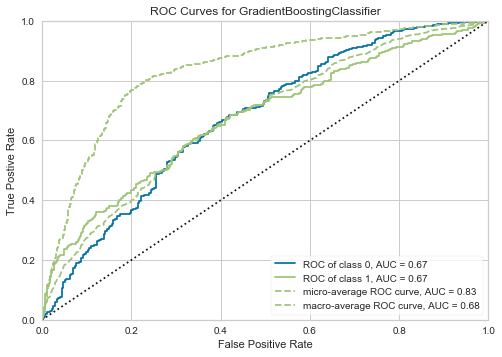

In [13]:
plot_model(tuned_gbc, plot = 'auc')

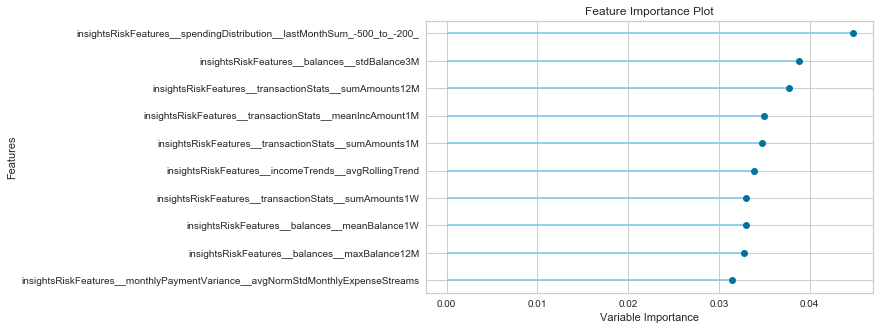

In [14]:
plot_model(tuned_gbc, plot='feature')

In [18]:
help(plot_model)

Help on function plot_model in module pycaret.classification:

plot_model(estimator, plot='auc')
    Description:
    ------------
    This function takes a trained model object and returns a plot based on the
    test / hold-out set. The process may require the model to be re-trained in
    certain cases. See list of plots supported below. 
    
    Model must be created using create_model() or tune_model().
    
        Example:
        --------
        from pycaret.datasets import get_data
        juice = get_data('juice')
        experiment_name = setup(data = juice,  target = 'Purchase')
        lr = create_model('lr')
        
        plot_model(lr)
    
        This will return an AUC plot of a trained Logistic Regression model.
    
    Parameters
    ----------
    estimator : object, default = none
    A trained model object should be passed as an estimator. 
    
    plot : string, default = auc
    Enter abbreviation of type of plot. The current list of plots supported are:

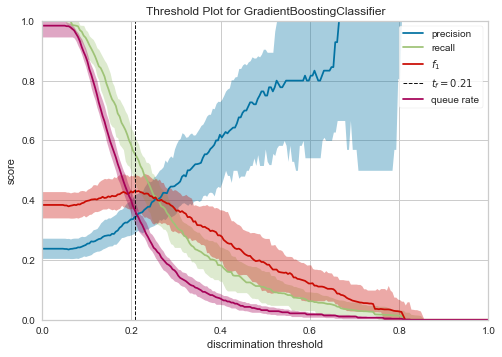

In [20]:
plot_model(tuned_gbc,plot='threshold')

In [43]:
optimize_threshold(tuned_gbc, true_positive = 100, false_positive = -1000);


Optimized Probability Threshold: 0.82 | Optimized Cost Function: 100


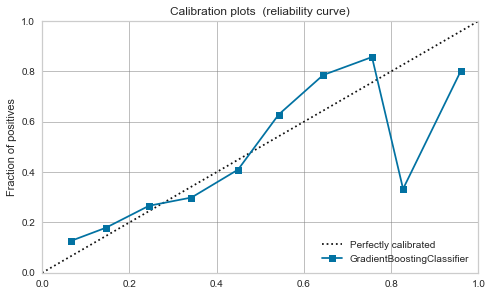

In [21]:
plot_model(tuned_gbc,plot='calibration')

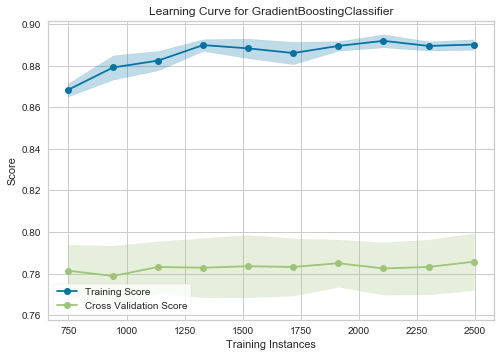

In [25]:
plot_model(tuned_gbc, plot='learning')

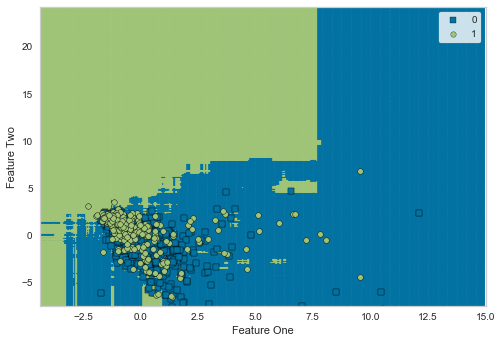

In [26]:
plot_model(tuned_gbc, plot='boundary')

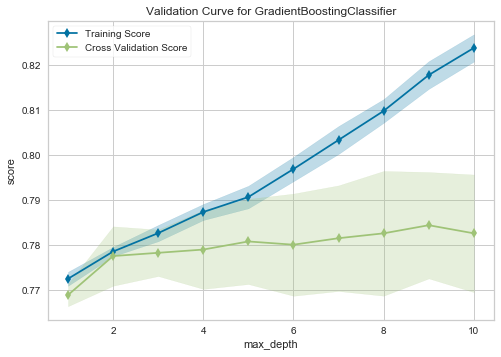

In [28]:
plot_model(tuned_gbc, plot='vc')

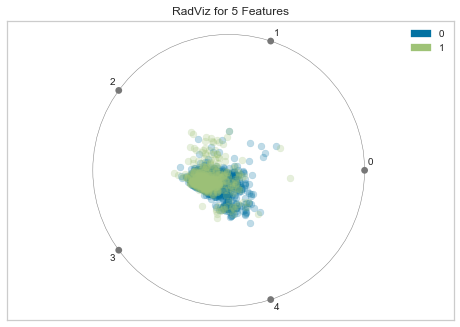

In [29]:
plot_model(tuned_gbc, plot='dimension')

In [30]:
plot_model(tuned_gbc, plot='parameter')

,Parameters
ccp_alpha,0
criterion,friedman_mse
init,None
learning_rate,0.02
loss,deviance
max_depth,60
max_features,log2
max_leaf_nodes,None
min_impurity_decrease,0
min_impurity_split,None


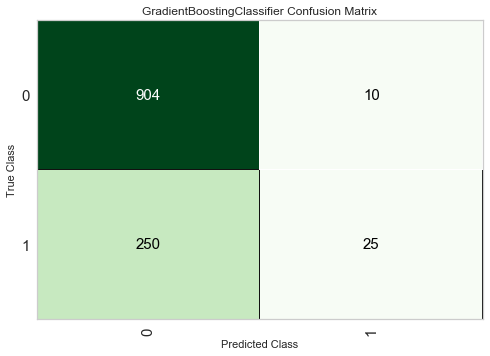

In [31]:
plot_model(tuned_gbc, plot='confusion_matrix')

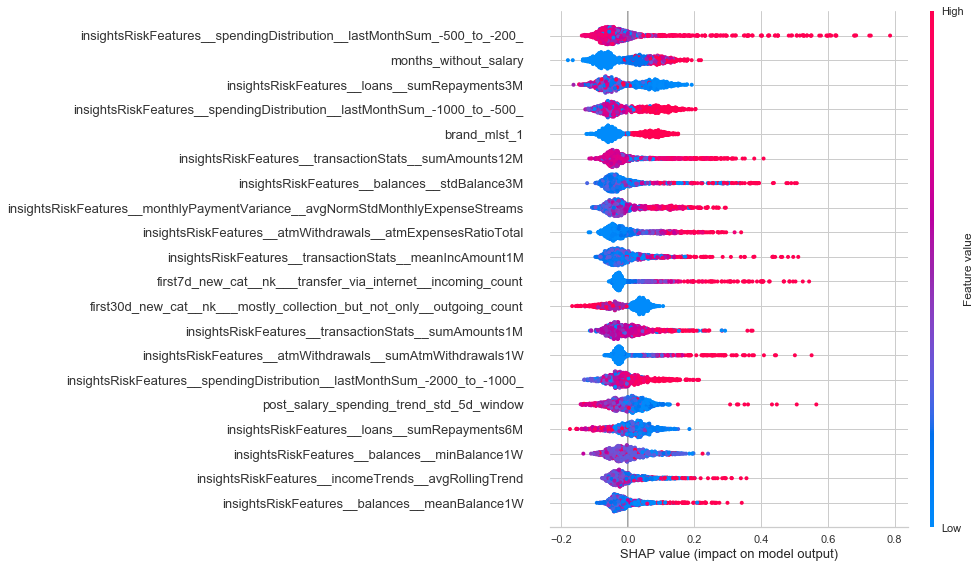

In [42]:
interpret_model(tuned_gbc)

In [44]:
!pwd

/Users/tomas/OneDrive - C Finance Oy/analytics/pycaret_test/notebooks
